In [53]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

<img src="data8logo.png" alt="Data 8 Logo" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Homework 5: Chance, Empirical Probability Distribution.

Please complete this notebook by filling in the cells provided. Before you begin, execute the previous cell to load the provided tests.

**Helpful Resource:**
- [Python Reference](http://data8.org/sp25/reference/): Cheat sheet of helpful array & table methods used in Data 8!
- [Sampling Methods Guide](https://drive.google.com/file/d/1k8uNN0Bg7J0BTgK-0Z5glDNtd_5FTJQl/view?usp=sharing): Guide for the randomization methods.

**Recommended Readings**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. **Before you begin, execute the cell below to setup the notebook by importing some helpful libraries.** Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, **please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is **due Wednesday, 2/26 at 5:00pm PT**. Submissions after this time will be accepted for 24 hours and will incur a 20% penalty. Any submissions later than this 24 hour period will not be accepted unless an extension has been granted as per the [policies](http://data8.org/sp25/policies/) page. Turn it in by Tuesday, 2/25 at 5:00pm PT for 5 extra credit points.

<span style="color:red">**Note: This homework has hidden tests on it. That means even though tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**</span>

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the [policies](http://data8.org/sp25/policies/#learning-cooperatively) page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday through Friday in [Warren Hall](https://www.berkeley.edu/map?warren) 101B. The office hours schedule appears [here](http://data8.org/sp25/schedule/).

---

The point breakdown for this assignment is given in the table below:
| Category | Points |
| --- | --- |
| Autograder (Coding questions) | 75 |
| Written | 25 |
| **Total** | 100 |

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 1. Roulette

In [54]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

A Nevada roulette wheel has 38 pockets and a small ball that rests on the wheel. When the wheel is spun, the ball comes to rest in one of the 38 pockets. That pocket is declared the winner. 

The pockets are labeled 0, 00, 1, 2, 3, 4, ... , 36. Pockets 0 and 00 are green, and the other pockets are alternately red and black. The table `wheel` is a representation of a Nevada roulette wheel. **Note that *both* columns consist of strings.** Below is an example of a roulette wheel!

<img src="roulette_wheel.jpeg" width="330px">

Run the cell below to load the `wheel` table.

In [55]:
wheel = Table.read_table('roulette_wheel.csv', dtype=str)
wheel

Pocket,Color
00,green
0,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


### Betting on Red ###
If you bet on *red*, you are betting that the winning pocket will be red. This bet *pays 1 to 1*. That means if you place a one-dollar bet on red, then:

- If the winning pocket is red, you gain 1 dollar. That is, you get your original dollar back, plus one more dollar.
- If the winning pocket is not red, you lose your dollar. In other words, you gain -1 dollars.

Let's see if you can make money by betting on red at roulette.

---

**Question 1.** Define a function `dollar_bet_on_red` that takes the name of a color and returns your gain in dollars if that color had won and you had placed a one-dollar bet on red. Remember that the gain can be negative. Make sure your function returns an integer. **(4 points)**

*Note:* You can assume that the only colors that will be passed as arguments are red, black, and green. Your function doesn't have to check that.


In [56]:
def dollar_bet_on_red(color):
    if color == 'red':
        return 1
    else:
        return -1

In [57]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Run the cell below to make sure your function is working.

In [58]:
print(dollar_bet_on_red('green'))
print(dollar_bet_on_red('black'))
print(dollar_bet_on_red('red'))

-1
-1
1


---

**Question 2.** Add a column labeled `Winnings: Red` to the table `wheel`. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on red. Your code should use the function `dollar_bet_on_red`. **(4 points)**

> *Hint:* You should not need a `for` loop for this question, instead try using a table method!

In [59]:
red_winnings = wheel.apply(dollar_bet_on_red, 'Color')
wheel = wheel.with_column('Winnings: Red', red_winnings)
wheel

Pocket,Color,Winnings: Red
00,green,-1
0,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


In [60]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Simulating 10 Bets on Red
Roulette wheels are set up so that each time they are spun, the winning pocket is equally likely to be any of the 38 pockets regardless of the results of all other spins. Let's see what would happen if we decided to bet one dollar on red each round.

--- 

**Question 3.** Create a table `ten_bets` by sampling the table `wheel` to simulate 10 spins of the roulette wheel. Your table should have the same three column labels as in `wheel`. Once you've created that table, set `sum_bets` to your net gain in all 10 bets, assuming that you bet one dollar on red each time. **(4 points)**

*Note:* The [Sampling Methods Guide](https://drive.google.com/file/d/1k8uNN0Bg7J0BTgK-0Z5glDNtd_5FTJQl/view?usp=sharing) may be helpful!

*Hint:* It may be helpful to print out `ten_bets` after you create it! 

In [61]:
ten_bets = wheel.sample(10, with_replacement=True)
sum_bets = sum(ten_bets.column('Winnings: Red'))
sum_bets

-2

In [62]:
grader.check("q1_3")

q1_3 results: All test cases passed!

Run the cells above a few times to see how much money you would make if you made 10 one-dollar bets on red. Making a negative amount of money doesn't feel good, but it is a reality in gambling. Casinos are a business, and they make money when gamblers lose.

--- 

**Question 4.** Let's see what would happen if you made more bets. Define a function `net_gain_red` that takes the number of bets and returns the net gain (a single integer representing the total amount won from betting on red that many times). **(4 points)**

*Hint:* You should use your `wheel` table within your function.


In [63]:
def net_gain_red(num_bets):
    bets = wheel.sample(num_bets, with_replacement=True)
    return sum(bets.column('Winnings: Red'))

In [64]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Run the cell below a few times to make sure that the results are similar to those you observed in the previous exercise.

In [65]:
net_gain_red(10)

-2

---

**Question 5.** Complete the cell below to simulate the net gain in 200 one-dollar bets on red, repeating the process 10,000 times. After the cell is run, `simulated_gains_red` should be an array with 10,000 entries, each of which is the net gain in 200 one-dollar bets on red. **(4 points)**

*Hint:* Think about which computational tool might be helpful for simulating a process multiple times. Section [9.3](https://inferentialthinking.com/chapters/09/3/Simulation.html) might be helpful!

*Note:* This cell might take a few seconds to run.


In [66]:
num_bets = 200
repetitions = 10000

simulated_gains_red = make_array()
for i in range(repetitions):
    simulated_gains_red = np.append(simulated_gains_red, net_gain_red(num_bets))

len(simulated_gains_red) # Do not change this line! Check that simulated_gains_red is length 10000.

10000

In [67]:
grader.check("q1_5")

q1_5 results: All test cases passed!

Run the cell below to visualize the results of your simulation.

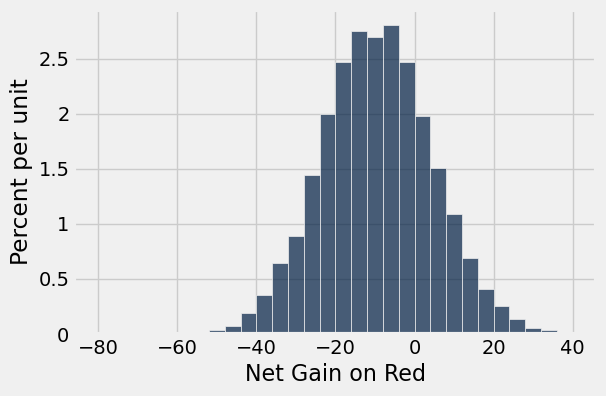

In [68]:
gains = Table().with_columns('Net Gain on Red', simulated_gains_red)
gains.hist(bins = np.arange(-80, 41, 4))

---

**Question 6:** Using the histogram above, decide whether the following statement is true or false:

>If you make 200 one-dollar bets on red, your chance of losing money is more than 50%.

Assign `loss_more_than_50` to either `True` or `False` depending on your answer to the question. **(4 points)**


In [69]:
loss_more_than_50 = True

In [70]:
grader.check("q1_6")

q1_6 results: All test cases passed!

### Betting on a Split ###
If betting on red doesn't seem like a good idea, maybe a gambler might want to try a different bet. A bet on a *split* is a bet on two consecutive numbers such as 5 and 6. This bet pays 17 to 1. That means if you place a one-dollar bet on the split 5 and 6, then:

- If the winning pocket is either 5 or 6, your gain is 17 dollars.
- If any other pocket wins, you lose your dollar, so your gain is -1 dollars.

---

**Question 7.** Define a function `dollar_bet_on_split` that takes a pocket number and returns your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**

*Hint:* Remember that the pockets are represented as strings.

*Hint:* Reference [section 9.1](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html?highlight=conditionals)! 


In [71]:
def dollar_bet_on_split(pocket):
    if pocket == '5' or pocket == '6':
        return 17
    else:
        return -1

In [72]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Run the cell below to check that your function is doing what it should.

In [73]:
print(dollar_bet_on_split('5'))
print(dollar_bet_on_split('6'))
print(dollar_bet_on_split('00'))
print(dollar_bet_on_split('23'))

17
17
-1
-1


---

**Question 8.** Add a column `Winnings: Split` to the `wheel` table. For each pocket, the column should contain your gain in dollars if that pocket won and you had bet one dollar on the 5-6 split. **(4 points)**


In [74]:
split_winnings = wheel.apply(dollar_bet_on_split, 'Pocket')
wheel = wheel.with_column('Winnings: Split', split_winnings)
wheel.show(5) # Do not change this line.

Pocket,Color,Winnings: Red,Winnings: Split
00,green,-1,-1
0,green,-1,-1
1,red,1,-1
2,black,-1,-1
3,red,1,-1


In [75]:
grader.check("q1_8")

q1_8 results: All test cases passed!

---

**Question 9.** Simulate the net gain in 200 one-dollar bets on the 5-6 split, repeating the process 10,000 times and saving your gains in the array `simulated_gains_split`. **(4 points)**

*Hint:* Your code in Questions 4 and 5 may be helpful here!


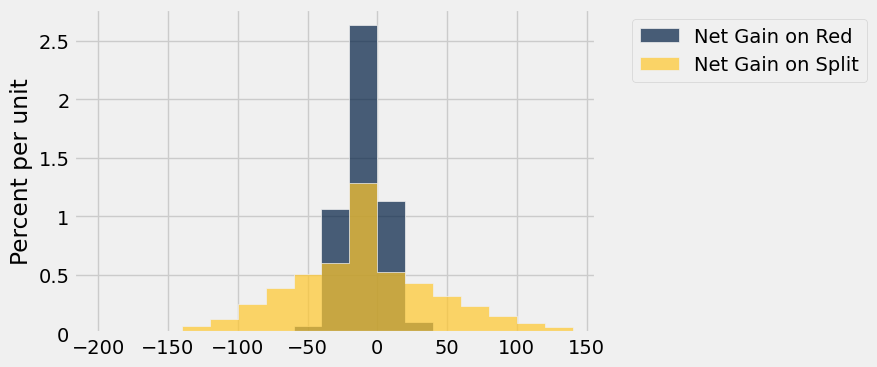

In [76]:
simulated_gains_split = make_array()
for i in range(10000):
    bets = wheel.sample(200, with_replacement=True)
    simulated_gains_split = np.append(simulated_gains_split, sum(bets.column('Winnings: Split')))

# Do not change the two lines below
gains = gains.with_columns('Net Gain on Split', simulated_gains_split)
gains.hist(bins = np.arange(-200, 150, 20))

In [77]:
grader.check("q1_9")

q1_9 results: All test cases passed!

---

**Question 10.** Look carefully at the visualization above, and assign `histogram_statements` to an array of the numbers of each statement below that can be correctly inferred from the overlaid histogram. **(4 points)**

1. If you bet one dollar 200 times on a split, your chance of losing money is more than 50%.
2. If you bet one dollar 200 times in roulette, your chance of making more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.
3. If you bet one dollar 200 times in roulette, your chance of losing more than 50 dollars is greater if you bet on a split each time than if you bet on red each time.

*Hint:* We've already seen one of these statements in a prior question.


In [78]:
histogram_statements = make_array(1, 2, 3)

In [79]:
grader.check("q1_10")

q1_10 results: All test cases passed!

If this exercise has put you off playing roulette, it has done its job. If you are still curious about other bets, [here](https://en.wikipedia.org/wiki/Roulette#Bet_odds_table) they all are, and [here](https://en.wikipedia.org/wiki/Roulette#House_edge) is the bad news. The house – that is, the casino – always has an edge over the gambler.

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 2. Chances

Before you do this exercise, make sure you understand the logic behind all the examples in [Section 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html). 

Good ways to approach probability calculations include:

- Thinking one trial at a time: What does the first one have to be? Then what does the next one have to be?
- Breaking up the event into distinct ways in which it can happen.
- Seeing if it is easier to find the chance that the event does not happen.

### Finding Chances

On each spin of a roulette wheel, all 38 pockets are equally likely to be the winner regardless of the results of other spins. Among the 38 pockets, 18 are red, 18 black, and 2 green. In each part below, write an expression that evaluates to the chance of the event described.

--- 

**Question 1.** The winning pocket is black on all of the first three spins. **(5 points)**


In [80]:
first_three_black = (18/38) * (18/38) * (18/38)

In [81]:
grader.check("q2_1")

q2_1 results: All test cases passed!

---

**Question 2.** The color green never wins in the first 10 spins. **(5 points)**


In [82]:
no_green = (36/38) ** 10

In [83]:
grader.check("q2_2")

q2_2 results: All test cases passed!

---

**Question 3.** The color green wins **at least once** on the first 10 spins. **(5 points)**


In [84]:
at_least_one_green = 1 - (36/38) ** 10

In [85]:
grader.check("q2_3")

q2_3 results: All test cases passed!

--- 

**Question 4.** Two of the three colors **never** win in the first 10 spins. **(5 points)**

*Hint:* What situation(s) lead to two of the three colors never winning in the first 10 spins?


In [86]:
lone_winners = (18/38)**10 + (18/38)**10 + (2/38)**10

In [87]:
grader.check("q2_4")

q2_4 results: All test cases passed!

### Comparing Chances
In each of Questions 5-7, two events A and B are described. Choose from one of the following three options and set each answer variable to a single integer:

1. Event A is more likely than Event B
2. Event B is more likely than Event A
3. The two events have the same chance.

You should be able to make the choices **without calculation**. Good ways to approach this exercise include imagining carrying out the chance experiments yourself, one trial at a time, and by thinking about the [law of averages](https://inferentialthinking.com/chapters/10/1/Empirical_Distributions.html#the-law-of-averages).

---

**Question 5.** A child picks four times at random from a box that has four toy animals: a bear, an elephant, a giraffe, and a kangaroo. **(5 points)**

- Event A: all four different animals are picked (assuming the child picks without replacement)
- Event B: all four different animals are picked (assuming the child picks with replacement)


In [88]:
toys_option = 1

In [89]:
grader.check("q2_5")

q2_5 results: All test cases passed!

---

**Question 6.** In a lottery, two numbers are drawn at random with replacement from the integers 1 through 1000. **(5 points)**

- Event A: The number 8 is picked on both draws
- Event B: The same number is picked on both draws


In [90]:
lottery_option = 2

In [91]:
grader.check("q2_6")

q2_6 results: All test cases passed!

---

**Question 7.** A fair coin is tossed repeatedly. **(5 points)**

- Event A: There are 60 or more heads in 100 tosses
- Event B: There are 600 or more heads in 1000 tosses

*Hint*: Think about the law of averages!


In [92]:
coin_option = 2

In [93]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## 3. Three Ways Python Draws Random Samples

You have learned three ways to draw random samples using Python:

- `tbl.sample` draws a random sample of rows from the table `tbl`. The output is a table consisting of the sampled rows. 

- `np.random.choice` draws a random sample from a population whose elements are in an array. The output is an array consisting of the sampled elements.

- `sample_proportions` draws from a categorical distribution whose proportions are in an array. The output is an array consisting of the sampled proportions in all the categories. 

In [94]:
# Look through this code and run this cell for questions 1 and 2
top_movies = Table.read_table('top_movies_2017.csv').select(0, 1)
top_movies.show(3)

Title,Studio
Gone with the Wind,MGM
Star Wars,Fox
The Sound of Music,Fox


In [95]:
# Look through this code and run this cell for questions 1 and 2
studios_with_counts = top_movies.group('Studio').sort('count', descending=True)
studios_with_counts.show(3)

Studio,count
Buena Vista,35
Warner Brothers,29
Paramount,25


In [96]:
# Look through this code and run this cell for questions 1 and 2
studios_of_all_movies = top_movies.column('Studio')
distinct_studios = studios_with_counts.column('Studio')

print("studios_of_all_movies:", studios_of_all_movies[:10], "...")
print("\n distinct_studios:", distinct_studios)

studios_of_all_movies: ['MGM' 'Fox' 'Fox' 'Universal' 'Paramount' 'Paramount' 'Universal' 'MGM'
 'Warner Brothers' 'Disney'] ...

 distinct_studios: ['Buena Vista' 'Warner Brothers' 'Paramount' 'Fox' 'Universal' 'Disney'
 'Columbia' 'MGM' 'United Artists' 'Newline' 'Paramount/Dreamworks' 'Sony'
 'Dreamworks' 'Lionsgate' 'RKO' 'Tristar' 'AVCO' 'IFC' 'Metro' 'NM' 'Orion'
 'Selz.' 'Sum.']


In [97]:
# Look through this code and run this cell for questions 1 and 2
studio_counts_only = studios_with_counts.column('count')
studio_proportions_only = studio_counts_only / sum(studio_counts_only)

print("studio_counts_only:", studio_counts_only)
print("\n studio_proportions_only:", studio_proportions_only)

studio_counts_only: [35 29 25 24 23 11  9  7  6  5  4  4  3  3  3  2  1  1  1  1  1  1  1]

 studio_proportions_only: [ 0.175  0.145  0.125  0.12   0.115  0.055  0.045  0.035  0.03   0.025
  0.02   0.02   0.015  0.015  0.015  0.01   0.005  0.005  0.005  0.005
  0.005  0.005  0.005]


In Questions 1 and 2, we will present a scenario. For each scenario, we will ask whether the desired result can be achieved by using a given function and the following tables/arrays: `top_movies`, `studios_with_counts`, `studios_of_all_movies`, `distinct_studios`, `studio_counts_only` and `studio_proportions_only`. You can assume we know which index of the array corresponds with the studio with that movie count/proportion.

_Note: **Do not** explain your answer; please answer yes or no and the name of the array/table._

---

**Question 3.1.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Using just this sample, do we have enough information to output `True` if Paramount appears more often than Warner Brothers among studios that released the sampled movies, and `False` otherwise?

*Example Answer:* Yes, with "studio_proportions_only".

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.

<!-- BEGIN QUESTION -->

**Question 3.1.1** Can this be done using the `sample` function? If yes, what table would we call `sample` on? **(5 points)**


Yes, with "top_movies"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.1.2** Can this be done using the `np.random.choice` function? If yes, what array would we call `np.random.choice` on? **(4 points)**


Yes, with "studios_of_all_movies"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.1.3** Can this be done using the `sample_proportions` function? If yes, what array would we call `sample_proportions` on? **(4 points)**


Yes, with "studio_proportions_only"

<!-- END QUESTION -->

---

**Question 3.2.** Simulate a sample of 10 movies drawn at random with replacement from the 200 movies. Using just this sample, do we have enough information to output `True` if the first sampled movie was released by the same studio as the last sampled movie? **(3 points)**

*Example Answer:* Yes, with "studio_proportions_only".

***Note***: Do not explain your answer for any of the options you've chosen; please follow the structure of the example answer provided.


<!-- BEGIN QUESTION -->

**Question 3.2.1** Can this be done using the `sample` function? If yes, what table would we call `sample` on? **(4 points)**


Yes, with "top_movies"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.2.2** Can this be done using the `np.random.choice` function? If yes, what array would we call `np.random.choice` on? **(4 points)**


Yes, with "studios_of_all_movies"

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.2.3** Can this be done using the `sample_proportions` function? If yes, what array would we call `sample_proportions` on? **(4 points)**


No, with none

<!-- END QUESTION -->

## Pets of Data 8

Yay your homework is complete. Look this monkey appreciates your effort!

<img src="monkey.png" width="40%" alt="hanuman monkey sitting on a ledge"/>

Congrats on finishing Homework 5!

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Written Work Submission

Below, you will see two cells. Running the first cell will automatically generate a PDF of all questions that need to be manually graded, and running the second cell will automatically generate a zip with your autograded answers. You are responsible for submitting both the coding portion (the zip) and the written portion (the PDF) to their respective Gradescope portals. **Please save before exporting!**

> **Important: You must correctly assign the pages of your PDF after you submit to the correct gradescope assignment. If your pages are not correctly assigned and/or not in the correct PDF format by the deadline, we reserve the right to award no points for your written work.**

If there are issues with automatically generating the PDF in the first cell, you can try downloading the notebook as a PDF by clicking on `File -> Save and Export Notebook As... -> Webpdf`. If that doesn't work either, you can manually take screenshots of your answers to the manually graded questions and submit one single PDF of your screenshots. Either way, **you are responsible for ensuring your submission follows our requirements, we will NOT be granting regrade requests for submissions that don't follow instructions.**

**You must submit the PDF generated via one of these methods, we will not accept screenshots or Word documents.**

In [49]:
from otter.export import export_notebook
from os import path
from IPython.display import display, HTML
name = 'hw05'
export_notebook(f"{name}.ipynb", filtering=True, pagebreaks=True)
if(path.exists(f'{name}.pdf')):
    display(HTML(f"Download your PDF <a href='{name}.pdf' download>here</a>."))
else:
    print("\n Pdf generation failed, please try the other methods described above")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [50]:
grader.check_all()

q1_1 results: All test cases passed!

q1_10 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q1_7 results: All test cases passed!

q1_8 results: All test cases passed!

q1_9 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_6 results: All test cases passed!

q2_7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [52]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)